<a href="https://colab.research.google.com/github/Abdulrahman-Yasser/Self-Driving-Car/blob/main/DataGenerator_TrafficSign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/traffic_sign_model

/content/drive/MyDrive/traffic_sign_model


In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
from google.colab.patches import cv2_imshow


In [ ]:
np.random.seed(0)

In [ ]:
%cd /content/drive/MyDrive/traffic_sign_model
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = val_data['features'], val_data['labels']
x_test, y_test = test_data['features'], test_data['labels']

/content/drive/MyDrive/traffic_sign_model


In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(len(data))


43


In [ ]:
len(x_train)

34799

<BarContainer object of 43 artists>

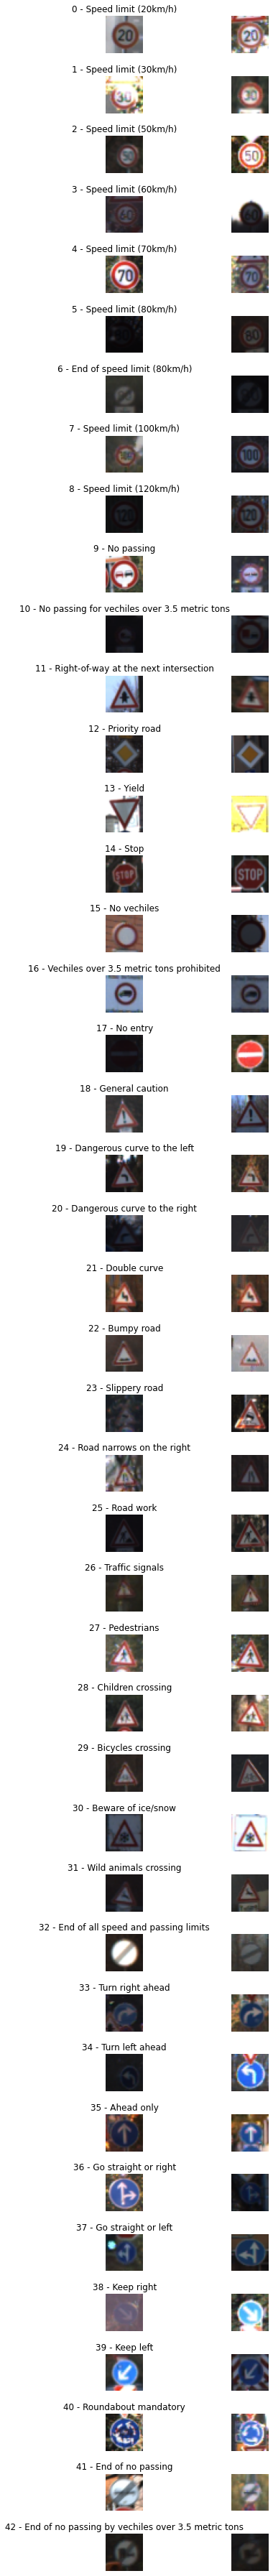

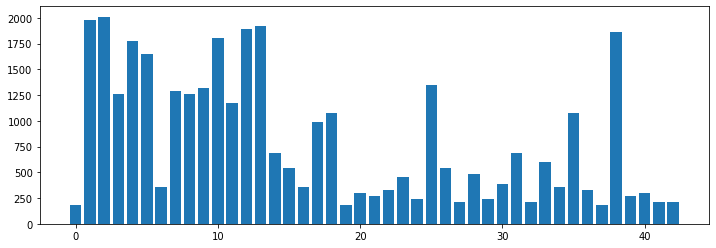

In [ ]:
num_of_samples = []
cols = 2
num_classes = 43
fig, axes = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5,50))
fig.tight_layout()
for i in range(cols):
  for j, row in data.iterrows():
    x = x_train[y_train == j]
    axes[j][i].imshow(x[random.randint(0, len(x) - 1), :, :])
    axes[j][i].axis("off")
    if i == 0:
      axes[j][i].set_title(str(j) + ' - ' + row['SignName'])
      num_of_samples.append(len(x))
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)

In [ ]:
import cv2
num_classes = 43


(32, 32, 3)


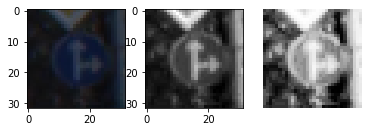

In [ ]:
def grayscale(l_img):
  my_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2GRAY)
  return my_img
def equalize(img):
  img = cv2.equalizeHist(img)
  return img
img = x_train[1000]
img_2 = grayscale(img)
img_3 = equalize(img_2)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(img)
axes[1].imshow(img_2, cmap="gray")
axes[2].imshow(img_3, cmap="gray")
plt.axis('off')
print(img.shape)


In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

In [ ]:
x_train = np.array(list(map(preprocessing, x_train)))
x_val = np.array(list(map(preprocessing, x_val)))
x_test = np.array(list(map(preprocessing, x_test)))


(34799, 32, 32)


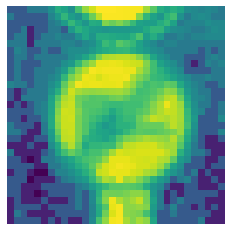

In [ ]:
plt.imshow(x_train[random.randint(0, len(x_train) - 1)])
plt.axis("off")
print(x_train.shape)

In [ ]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
datagen.fit(x_train)


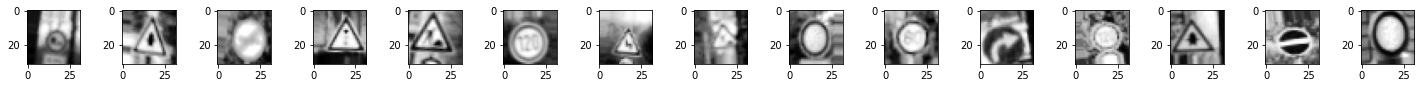

In [ ]:
from IPython.core.pylabtools import figsize
batches = datagen.flow(x_train, y_train, batch_size=20)
x_batch, y_batch = next(batches)

fig, axis = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
  axis[i].imshow(x_batch[i].reshape(32,32), cmap='gray')

In [ ]:
x_test.shape

(12630, 32, 32, 1)

In [ ]:
y_test.shape

(12630,)

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)


In [ ]:
y_test.shape

(12630, 43)

In [ ]:
def leNet_model_1():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(32,32,1),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(15, (5,5),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def leNet_model_1():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60, (5,5),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(30, (3,3),activation='relu'))
  model.add(Conv2D(30, (3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

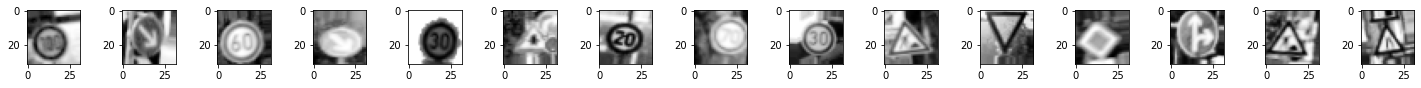

In [ ]:
from IPython.core.pylabtools import figsize
batches = datagen.flow(x_train, y_train, batch_size=20)
x_batch, y_batch = next(batches)

fig, axis = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
  axis[i].imshow(x_batch[i].reshape(32,32), cmap='gray')

In [ ]:
my_model = leNet_model_1()
print(my_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
x_train.shape

(34799, 32, 32, 1)

In [ ]:
history = my_model.fit(x_train, y_train, epochs=10, validation_data=(x_val,y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
history = my_model.fit(datagen.flow(x_train, y_train, batch_size=50, shuffle=True ), steps_per_epoch=695, epochs=10, validation_data=(x_val, y_val), shuffle=1 )

Epoch 1/10
 22/695 [..............................] - ETA: 5:38 - loss: 3.6304 - accuracy: 0.0573

KeyboardInterrupt: ignored

Text(0.5, 0, 'epochs')

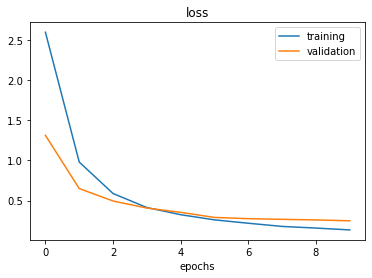

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epochs')

trainint acuracy Score 0.9616081118583679
validation accuracy Accuracy 0.9199546575546265
test Score 0.35244306921958923
test Accuracy 0.9091053009033203


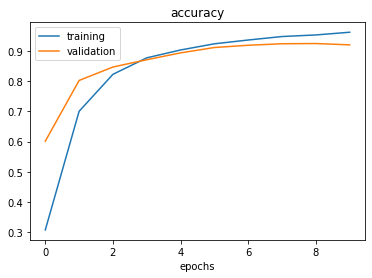

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('accuracy')
plt.xlabel('epochs')
score = my_model.evaluate(x_test,y_test,verbose=0)
print('trainint acuracy Score', history.history['accuracy'][-1])
print('validation accuracy Accuracy', history.history['val_accuracy'][-1])
print('test Score', score[0])
print('test Accuracy', score[1])

In [ ]:
model_json = my_model.to_json()
with open('my_model.json', 'w') as json_file:
  json_file.write(model_json)

from keras.models import save_model
my_model_saved = save_model(my_model, '/content/weights.hdf5')